# Precipitation Analysis - Part II!
## In this assignment, you'll use the same data as your last assignment (Week 4 Assignment)
<br>
- First, you'll pick up right where you left off in the last assignment, and do some comparison operations using UIUC data (precipitation, over time, just at one location)
<br><br>
- Then, we'll switch gears
<br><br>
- To considering United-States-wide data instead of UIUC data....so now our data that has a spatial component, among others. So, now we're working with more dimensions than we were when just looking at precipitation for the UIUC gridpoint, yes?
<br><br>
- This will include doing additional logical/comparisons operations
<br><br>
- AND creating maps of the results of those operations!

## First things first: copy and paste your cells from Week 4 Assignment to the start of this assignment, before this assignment's questions!
##  YOU ARE WELCOME TO INSTEAD COPY AND PASTE THE CELLS FROM *MY* SOLUTION TO THE WEEK 4 ASSIGNMENT, once they are posted

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt # function in matplotlib that produces quick and easy plots
import cartopy.crs as ccrs # for projection
import cartopy.feature as cfeature # for map features 
from cartopy.util import add_cyclic_point

In [2]:
# Load in data
data = xr.open_dataarray('precip.V1.0.2024.nc')

In [3]:
lat2 = data['lat'] # these are *coordinate* variables in the Netcdf file
                          # they are affiliated with the data array, 'data'
                          # and thus we can access them like this!
lon2 = data['lon']
times2 = data['time']

precip = data.values # nifty function that converts the Xarray data array variable into a NumPy array
# 'precip' contains all the precip data, fyi
lat = lat2.values # values of the latitude coordinate variable
lon = lon2.values # values of the longitude coordinate variable

In [4]:
# (a.)
# Coordinates of campus: 
uiuc_lat = 40.106276 
uiuc_lon = -88.227523 + 360

# Distance from each point of the longitude array from the longitude of uiuc 
# We want absolute value because we want minimum distance, whether its to the east or the west!
lon_uiuc2 = np.fabs(lon - uiuc_lon)
print(lon_uiuc2.shape) # prove to yourself that the result of the above is an array!

# Now the same for latitude
lat_uiuc2 = np.fabs(lat - uiuc_lat)
print(lat_uiuc2.shape)

index_lon = lon_uiuc2.argmin() # this is the POSITIONAL INDEX of the lon
index_lat = lat_uiuc2.argmin()

print(index_lat, index_lon)

# Sanity check
# Index of lat of gridpoint nearest campus: 80
# Index of lon of gridpoint nearest campus: 167

# If you are unable to figure out how to do (a.) correctly
# You can move forwward in the assignment using this!

(300,)
(120,)
80 167


In [5]:
uiuc_precip = precip[:,index_lat,index_lon]

Text(0, 0.5, 'Frequency (Days)')

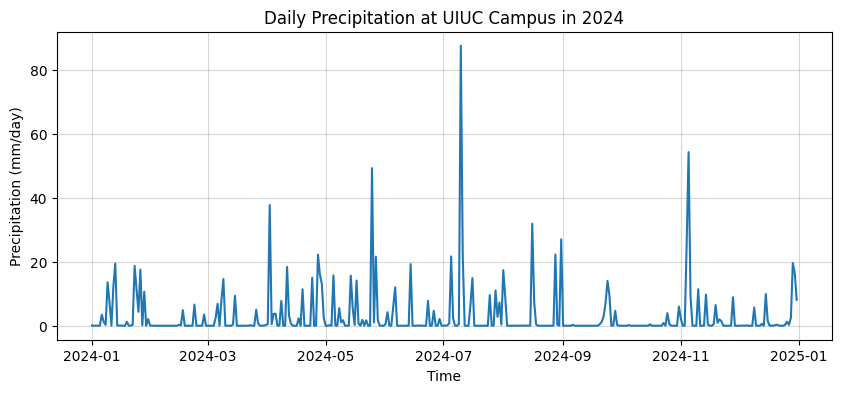

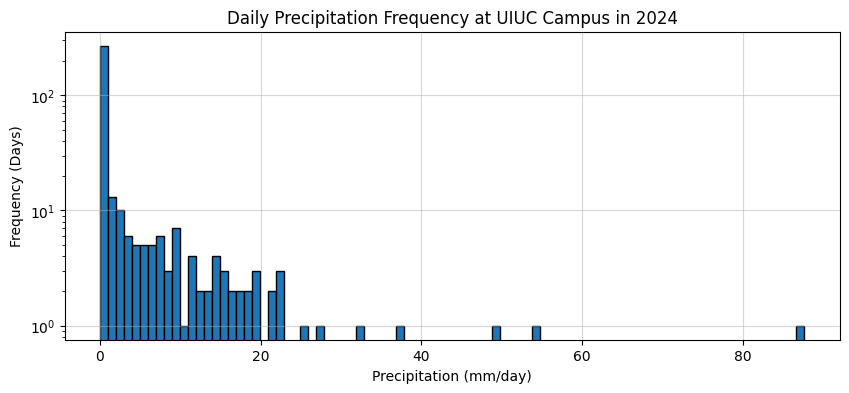

In [6]:
# Plot your line plot!
fig,ax = plt.subplots(figsize=(10, 4))
ax.plot(times2, uiuc_precip)
ax.grid(alpha=0.5)
ax.set_title('Daily Precipitation at UIUC Campus in 2024')
ax.set_ylabel('Precipitation (mm/day)')
ax.set_xlabel('Time')

# Plot your histogram!
fig,ax = plt.subplots(figsize=(10, 4))
ax.hist(uiuc_precip, bins=88, edgecolor='black', log=True) # Set y-axis to be logarithmic to make lower freq more visible
ax.grid(alpha=0.5)
ax.set_title('Daily Precipitation Frequency at UIUC Campus in 2024')
ax.set_xlabel('Precipitation (mm/day)')
ax.set_ylabel('Frequency (Days)')

In [7]:
uiuc_precip_in = uiuc_precip / 25.4 # mm to in

#### (1)  USING ONLY DATA FOR THAT SINGLE GRIDPOINT NEAREST URBANA-CHAMPAIGN, calculate the following statistics for precip:
#### IMPORTANT NOTE: You'll want to use your DATA IN INCHES (so your data after conversion from mm to inches!)

  - (a.) How many days did no precip fall?
<br><br>
  - (b.) How many days did more than one inch fall?
<br><br>
  - (c.) What was the maximum amount of precip that fell?
<br><br>
  - (d.) What day did this maximum amount of precip fall?

In [8]:
# (a.) how many days did no precip fall?
print('Days with no precip: ', np.sum(uiuc_precip_in == 0))

 
# sanity check: 207 days 

Days with no precip:  207


In [9]:
#  (b.) how many days did more than one inch fall?
print('Days with >1 inch of precip: ', np.sum(uiuc_precip_in > 1))



# sanity check: 7 days

Days with >1 inch of precip:  7


In [10]:
# (c.) what was the maximum amount of precip that fell?
print('Maximum precip: ', np.nanmax(uiuc_precip_in),'in')


# sanity check: 3.45 inches

Maximum precip:  3.4498916 in


In [11]:
# (d.) what day did it occur on?
max_index = np.argmax(uiuc_precip_in)
print('Day of maxmimum precip: ', times2[max_index].values)



Day of maxmimum precip:  2024-07-10T00:00:00.000000000


### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
### FOR THE REST OF THIS ASSIGNMENT YOU ARE USING YOUR FULL PRECIPITATION DATASET, I.E., THE 3D DATA, NOT A 1D TIME SERIES OF PRECIPITATION DATA FROM UIUC LIKE YOU USED IN Q1
### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#### (2)  As you may have noticed if you've played around with outputting some precip values, our array consists of NaNs in the ocean locations
- (a.) create a mask that identifies and masks out NaNs, and save your masked variable to a new variable - *you learned a formal way to do this in your lessons this week!*
<br><br>
- (b.) print out the masked variable, the mask itself, and your original data
<br><br>
- (c.) this is prep for the next question, when we're considering data in all locations, not just at UIUC where there is no missing data, and don't want to deal with NaNs

In [12]:
# a.)
data_in = data / 25.4 # mm to in
masked_array = np.ma.masked_invalid(data_in) # Create mask

In [13]:
# b.)

# Masked variable
print(masked_array)

# The mask itself
print(masked_array.mask)

# The original data
print(masked_array.data)

[[[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 ...

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]]
[[[ True  

#### (3)  Now, calculate and plot each of the following (on a 2D, shaded contour plot that includes a map), USING YOUR MASKED DATA FROM 2(a)
  - (a.) the average daily precipitation in January at each location
<br><br>
  - (b.) cumulative precipitation in 2024 at each location - i.e., the TOTAL precipitation that fell during the year 2024 at each location
<br><br>
  - (c.) the number of days in 2024 when no precipitation was recorded, at each location  

***Do not use any for loops!***

*Specific plotting requirements. For each plot, you should*:
 - use object-oriented plotting 
 - create a filled contour plot of the given quantity that you calculate earlier in this Q
 - on a *map* using Cartopy 
 - with a colorbar, using a colormap of your choice that you explicitly set
 - and labels for colorbar, plot axes, title, etc.

####  Then - don't forget to do some interpretation of your plots in (d.) and (e.)!

  - (d.) *Interpret*: which parts of the country experience the greatest total (cumulative) precipitation in 2024? 
<br><br>
  - (e.)  *Interpret*: which parts of the country experience the most days with NO precipitation? Comment on how this does or does not line up with your understanding of United States geography and features.

In [14]:
# Define function for plotting
def plot_precip(array, plot_title, cbar_title='Precipitation (in)', cmap='Blues'):
    """
    Function made to plot maps for part 3.

    Inputs:
    array (np.array): 2D (spatial) array of data for plotting
    plot_title (str): Title you want for the plot
    cbar_title (str): Title for the colorbar
    cmap (str): Colormap to use for plot
    """

    proj=ccrs.PlateCarree() # Map projection

    #Create a figure with an axes object on which we will plot
    fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

    # Add cyclic point since there's a data gap in this data set at the Prime Meridian
    precip2, lon2 = add_cyclic_point(array, coord=lon)

    # Create our lat lon grid
    X, Y = np.meshgrid(lon2, lat2)

    # Create our contour plot
    cs = ax.contourf(X, Y, precip2, transform=proj, cmap=cmap, levels=10, extend='max')

    # Create our colorbar
    cb=fig.colorbar(cs,shrink=0.35, pad=0.01, extend='max')
    cb.set_label(cbar_title)

    # Gridlines
    gl = ax.gridlines(alpha=0.5, linestyle=':', draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    # Add map features
    ax.add_feature(cfeature.STATES, edgecolor="black", linewidths=1, alpha=0.6)
    ax.add_feature(cfeature.COASTLINE, edgecolor="black")
    ax.add_feature(cfeature.BORDERS, edgecolor="black")

    # Add a title
    ax.set_title(plot_title)

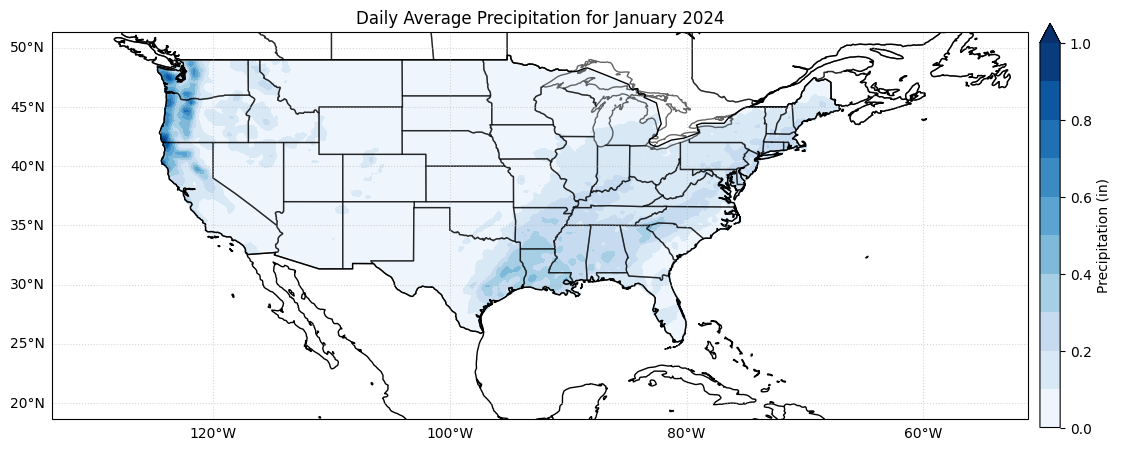

In [15]:
# a.)

# Calculate January mean daily precip
jan_mean = np.nanmean(masked_array[0:31,:,:], axis=0) # upper bound is non-inclusive

# Call plotting function
plot_precip(jan_mean, plot_title='Daily Average Precipitation for January 2024')

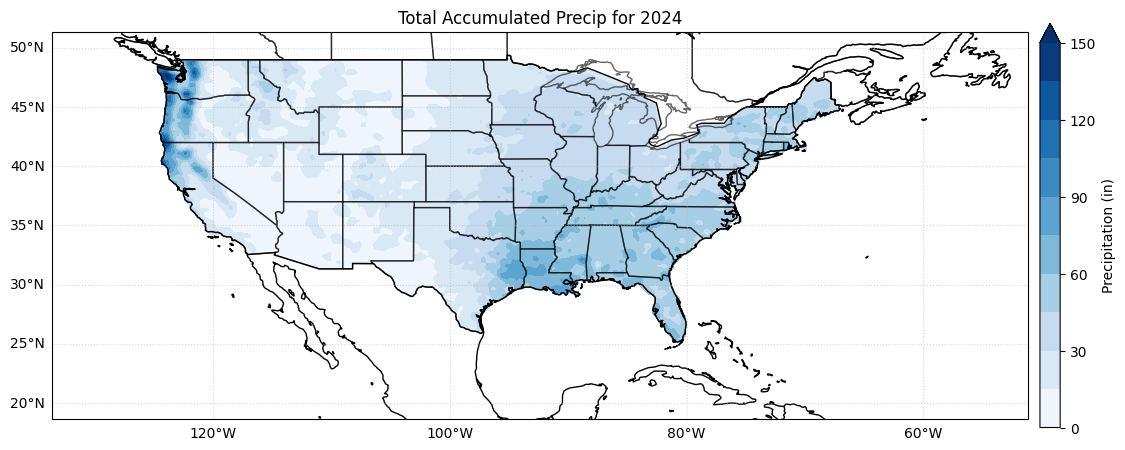

In [16]:
# b.)

# Calculate accumulated precip for 2024
accprecip_2024 = np.nansum(masked_array, axis=0)

# Call plotting function
plot_precip(accprecip_2024, plot_title='Total Accumulated Precip for 2024')

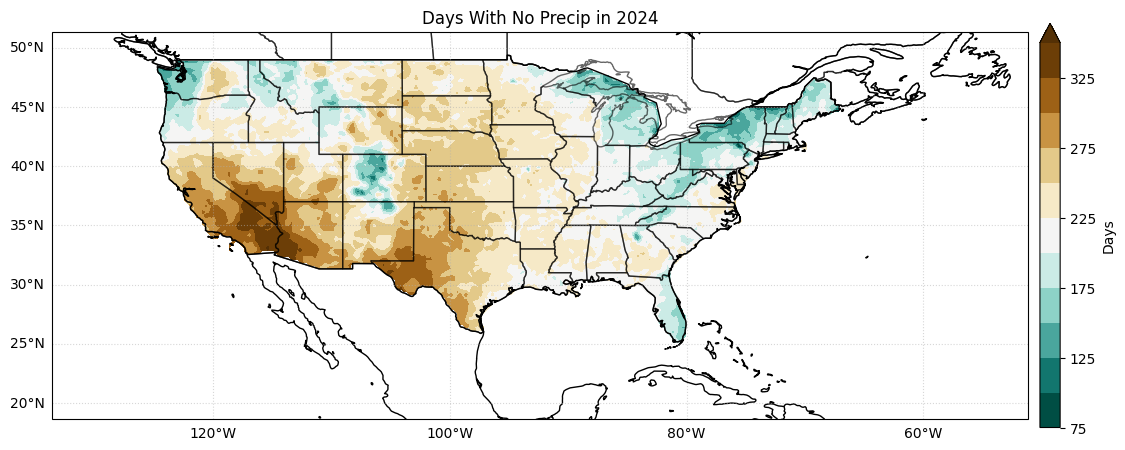

In [17]:
# c.) 

# Calculate days with no precip
days_with_no_precip = np.nansum(masked_array == 0, axis=0)

# Call plotting function
plot_precip(days_with_no_precip, plot_title='Days With No Precip in 2024', cbar_title='Days', cmap='BrBG_r')

## d.) 

It appears that the Pacific Northwest experiences the greatest cumulative precipitation in 2024. Parts of the northern Gulf Coast (East TX, LA, and MS) appear to come in second in cumulative precipitation. 

## e.)

The part of the country that appears to have the most days with no precipitation is the Southwest, specifically western AZ, southern CA, and southern NV. This lines up with my understanding of the geography of that region as it includes the Mojave and Sonoran deserts, which are historically some of the driest parts of the country. 